**Classification of sleep stages**



There are primarily 5 to 6 stages of sleep (different sources classify differently).Here, 5 stages are being used. These are starting from 'Wake' stage as class-0 upto REM (rapid eye movement) stage as class-4.

EEG signals are being used for this classification. The dataset used is from https://sleepdata.org/

First the raw data is broken into 30 seconds segments. It is stored in data_set.npy. It has 20000 such segments. 

Then 22 time-domain features are calculated from each of them. It is stored in train_test_data.npy.

PCA is then used to reduce the number of features. The data is minmax normalized and then it is fed into a multi-layer neural network for classification. This is done in main.py.

In the MLP, 6 layers are being used (including input and output layers). The output layer has softmax activation function since this is a multi-class classification. Categorical-crossenropy is used as a loss function. Adam optimizer is used for gradient descent. 

The different tunable hyperparameters or variables in the problem are:


1.   Number of layers in the MLP
2.   Number of neurons in each layer
3.   Activation function for hidden layers
4.   Number of epochs to run
5.   Number of components to use in PCA
6.   Loss function
7.   Optimizer for gradient descent
8.   Learning rate
9.   Batch size



In [ ]:
import os
import tensorflow as tf
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}
#tf.logging.set_verbosity(tf.logging.ERROR)

use_tpu = False #@param {type:"boolean"}
use_gpu = True #@param {type:"boolean"}
use_cpu = False #@param {type:"boolean"}

if use_tpu:
  
  ## FOR TPU


  if use_tpu:
      assert 'COLAB_TPU_ADDR' in os.environ, 'Missing TPU; did you request a TPU in Notebook Settings?'

  if 'COLAB_TPU_ADDR' in os.environ:
    TF_MASTER = 'grpc://{}'.format(os.environ['COLAB_TPU_ADDR'])
  else:
    TF_MASTER=''
  # Model specific parameters

  # TPU address
  tpu_address = TF_MASTER

  # Number of epochs
  epochs = 50

  # Number of steps_per_epoch
  steps_per_epoch = 5

  # NOTE: Total number of training steps = Number of epochs * Number of steps_per_epochs
  import tensorflow as tf
  print("Tensorflow version " + tf.__version__)

  try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()  # TPU detection
    print('Running on TPU ', tpu.cluster_spec().as_dict()['worker'])
  except ValueError:
    raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

  tf.config.experimental_connect_to_cluster(tpu)
  tf.tpu.experimental.initialize_tpu_system(tpu)
  tpu_strategy = tf.distribute.experimental.TPUStrategy(tpu)

if use_gpu:
  ## FOR GPU
  #' ' means CPU whereas '/device:G:0' means GPU
  print('using gpu?')
  import tensorflow as tf
  print(tf.test.gpu_device_name())    
  from tensorflow.python.client import device_lib
  #print(device_lib.list_local_devices()) # LIST OF ALL DEVICES AVAILABLE
  #!cat /proc/meminfo    # RAM DETAILS


if use_cpu: 
  !cat /proc/cpuinfo   #RAM DETAILS


using gpu?
/device:GPU:0


In [ ]:
#required for extracting the raw data
!pip install mne

     |████████████████████████████████| 6.8MB 6.9MB/s 
     |████████████████████████████████| 768kB 55.0MB/s 
  Created wheel for pycwt: filename=pycwt-0.3.0a22-cp36-none-any.whl size=17808 sha256=00059688932cba90ab69b88d680a9846de0cf494e8309d124758f1924a6b4abb
  Stored in directory: /root/.cache/pip/wheels/e2/e0/b4/311806bd9b792ec6904dbac270666e88912a345730711283af
Successfully built pycwt


In [ ]:
# builds the data_set.npy
!python /content/drive/MyDrive/ML_lab_mini_project/base_set_builder.py

patient_no: 20
Time taken so far: 106.30664873123169 seconds
segs: (array([0, 1, 2, 3, 4]), array([ 895,  504, 1376,  516,  509]))
RAM: 1013.8515625 MB


patient_no: 40
Time taken so far: 226.03103518486023 seconds
segs: (array([0, 1, 2, 3, 4]), array([2050, 1265, 2681,  921,  883]))
RAM: 1460.3984375 MB


patient_no: 60
Time taken so far: 344.9650845527649 seconds
segs: (array([0, 1, 2, 3, 4]), array([2986, 2073, 4308, 1237, 1196]))
RAM: 1984.80078125 MB


KeyError: Unscored|9
KeyError: Unscored|9
KeyError: Unscored|9
KeyError: Unscored|9
patient_no: 80
Time taken so far: 464.25300669670105 seconds
segs: (array([0, 1, 2, 3, 4]), array([4095, 2829, 5568, 1663, 1645]))
RAM: 2454.34375 MB


patient_no: 100
Time taken so far: 589.5066237449646 seconds
segs: (array([0, 1, 2, 3, 4]), array([5020, 3518, 6952, 2148, 2162]))
RAM: 2900.80859375 MB


Total time: 602.0540952682495 seconds


In [ ]:
# builds the train_test_data.npy
!python /content/drive/MyDrive/ML_lab_mini_project/train_set_builder.py

Base dataset loaded in 4.9148359298706055 seconds
200: Time taken so far is 9.006001472473145 seconds
400: Time taken so far is 13.104836463928223 seconds
600: Time taken so far is 17.206376314163208 seconds
800: Time taken so far is 21.255319118499756 seconds
1000: Time taken so far is 25.401881217956543 seconds
1200: Time taken so far is 29.533227920532227 seconds
1400: Time taken so far is 33.68109440803528 seconds
1600: Time taken so far is 38.19393730163574 seconds
1800: Time taken so far is 42.241337299346924 seconds
2000: Time taken so far is 46.331793785095215 seconds
2200: Time taken so far is 50.379103660583496 seconds
2400: Time taken so far is 54.42309832572937 seconds
2600: Time taken so far is 58.43540549278259 seconds
2800: Time taken so far is 62.49404048919678 seconds
3000: Time taken so far is 66.54334807395935 seconds
3200: Time taken so far is 70.60115766525269 seconds
3400: Time taken so far is 77.16794657707214 seconds
3600: Time taken so far is 81.17909264564514 

In [ ]:
# Example of the time-domain feature set for a segment of class:1

import numpy as np

d=np.load('/content/drive/MyDrive/ML_lab_mini_project/train_data.npy',allow_pickle=True)
print(np.shape(d[0][1]))
print(d[0])

(22,)
[1
 array([ 1.25000000e-04, -1.24019608e-04, -2.47267974e-06,  9.79660082e-05,
        2.49019608e-04, -1.10294118e-04, -4.41176471e-06,  1.03431373e-04,
        4.24459128e-02, -1.59293059e+00,  8.92541176e-05,  2.79200000e+03,
        1.55300000e+03,  9.60345290e-09,  1.53604360e-04,  1.56793527e+00,
        3.01753092e-05,  3.08018156e-01,  9.59733876e-09,  1.75337363e+00,
        1.65634464e-01,  3.52200000e+03])]


In [2]:
# trainig and testing
!python /content/drive/MyDrive/ML_lab_mini_project/main.py

2020-12-06 16:42:51.134312: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
Shape of training data:
(19000, 10)

Shape of training labels:
(19000,)

Labels count of each class
(array([0., 1., 2., 3., 4.], dtype=float32), array([4860, 3415, 6648, 2040, 2037]))

y_train (one-hot-encoded)
[[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1.]]

2020-12-06 16:42:53.059283: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-12-06 16:42:53.101010: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-12-06 16:42:53.101791: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapa

The training set accuracy is around 60-65%. But the testing set accuracy is quite low. Almost all of the predicted labels are of the same class. A possible reasons for this is outliers in the data. Also the quantity of the data is probably too small for this process.

And from the point of view of training, we can further try tuning the learning rate and the batch-size, or use a simpler model. Different activation functions for the hidden layers also makes the predictions differ. 

**Plots of EEG signals of each of the classes are provided below:**

In [ ]:
import numpy as np
d=np.load('/content/drive/MyDrive/ML_lab_mini_project/data_set.npy',allow_pickle=True)
print('shape of the dataset:')
print(np.shape(d))
eeg_eg={}
label=0
for seg in range(np.shape(d)[0]):
  if d[seg][0]==label:
    eeg_eg[label]=d[seg][1]
    label=label+1
  if label==5:
    break

In [ ]:
print('shape of each segment (125 Hz*30 seconds=3750 samples)')
print(np.shape(d[0][1]))

In [ ]:
import matplotlib.pyplot as plt
x=range(3750)
for label in range(5):
  plt.figure(figsize=(50,10))
  plt.rcParams.update({'font.size': 35})
  plt.plot(x,eeg_eg[label])
  plt.title(f'Example of a 30-second EEG segment of class: {label}')
  plt.xlabel('Samples (0 to 3750 at a sampling rate of 125 samples/s)')
  plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [40]:
# histogram of different stages for the used data
train_test_list=np.load('/content/drive/MyDrive/ML_lab_mini_project/train_test_data.npy',allow_pickle=True)
y=np.asarray(train_test_list[:,0])
print(np.unique(y,return_counts=True))


(array([0, 1, 2, 3, 4], dtype=object), array([5112, 3545, 7014, 2148, 2181]))


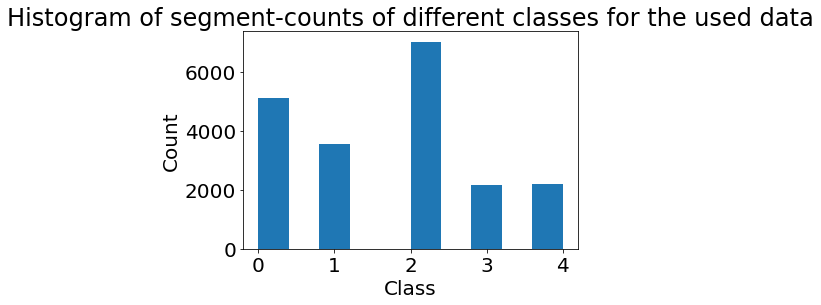

In [51]:
plt.rcParams.update({'font.size': 20})
plt.hist(y,bins=10)
plt.title('Histogram of segment-counts of different classes for the used data')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()